### Importamos las librerías necesarias

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de Datos y representación gráfica

In [88]:
fname = 'global_temperature.csv'

In [89]:
temp_data = pd.read_csv(fname,skiprows=2)
temp_data

,Year,Value
0,1880,-0.47
1,1881,-0.45
2,1882,-0.41
3,1883,-0.60
4,1884,-0.60
...,...,...
132,2012,0.92
133,2013,1.01
134,2014,1.02
135,2015,1.35


In [90]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

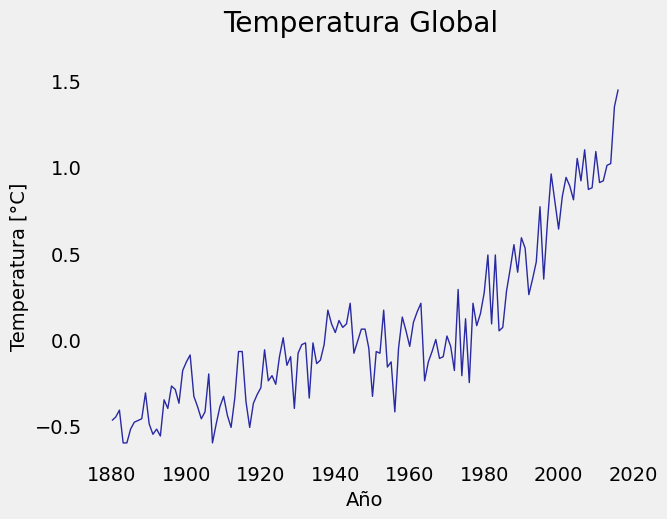

In [91]:
plt.plot(temp_data['Year'], temp_data['Value'], color='#2929a3', linestyle='-', linewidth=1) 
plt.title('Temperatura Global \n')
plt.xlabel('Año')
plt.ylabel('Temperatura [°C]')
plt.grid();
t = temp_data['Year']
y = temp_data['Value']

## Regresión lineal:
### Vector de términos constantes, vector de observaciones y matriz de coeficientes

In [92]:
t = temp_data['Year'].values
y = temp_data['Value'].values
A = np.vstack([t, np.ones(len(t))]).T

In [93]:
### Primer método: Cálculo de inv(A'A)

[ 1.03702839e-02 -2.01486854e+01]


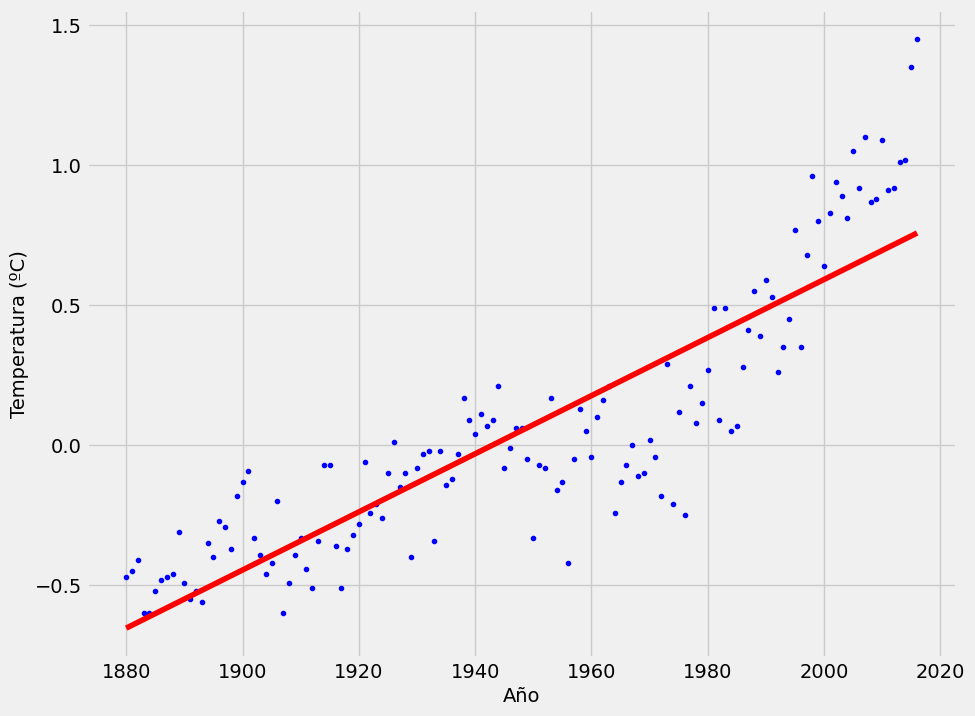

In [96]:
xest = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(xest)
plt.figure(figsize = (10,8))
plt.plot(t, y, 'b.')
plt.plot(t, xest[0]*t + xest[1], 'r')
plt.xlabel('Año')
plt.ylabel('Temperatura (ºC)')
plt.show()

In [95]:
## Solución Mínimos Cuadrados

In [80]:
### Segundo método: Cálculo de pseudoinversa de A

In [78]:
pinv = np.linalg.pinv(A)
xest_2 = pinv.dot(y)
print(xest_2)

[ 1.03702839e-02 -2.01486854e+01]


In [ ]:
### Tercer método: Usando numpy.linalg.lstsq

In [79]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[ 1.03702839e-02 -2.01486854e+01]


In [ ]:
#### Cálculo de la SVD

In [83]:
import numpy.linalg as la
import scipy.linalg as spla
U, sigma, VT = la.svd(A)
Sigma = np.zeros(A.shape)
Sigma[:2,:2] = np.diag(sigma)
(U.dot(Sigma).dot(VT) - A).round(4)
Sigma_pinv = np.zeros(A.shape).T
Sigma_pinv[:2,:2] = np.diag(1/sigma[:2])

In [84]:
x_svd = VT.T.dot(Sigma_pinv).dot(U.T).dot(y)
x_svd

array([ 1.03702839e-02, -2.01486854e+01])

In [ ]:
## Regresión Múltiple

[ 9.41944747e-05 -3.56611390e-01  3.37144144e+02]


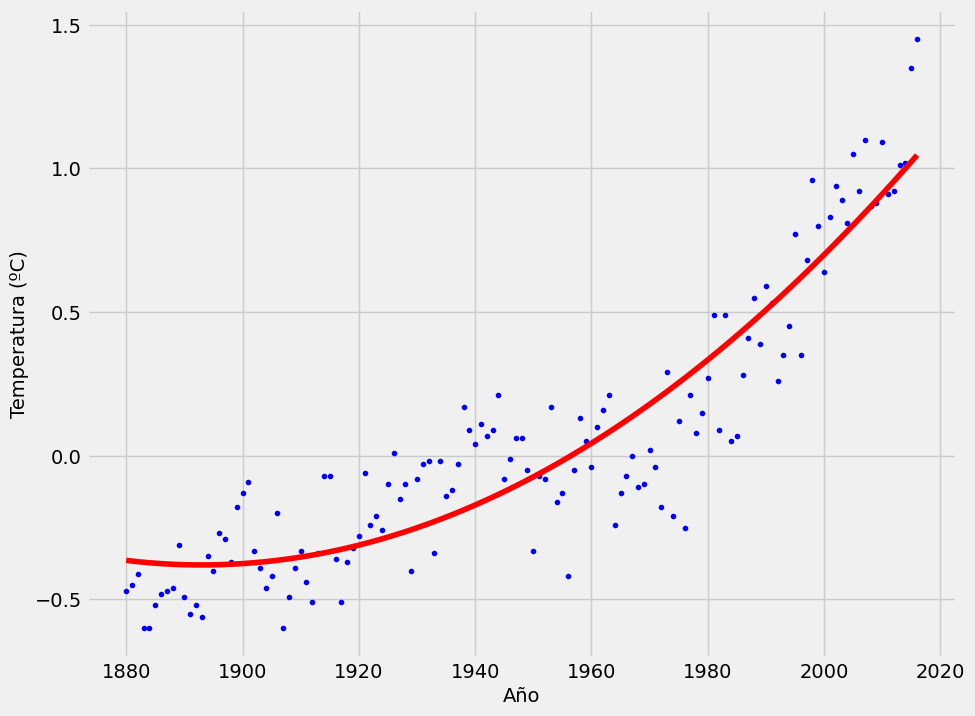

In [111]:
A = np.vstack([t*t,t, np.ones(len(t))]).T
pinv = np.linalg.pinv(A)
xest = pinv.dot(y)
print(xest)
plt.figure(figsize = (10,8))
plt.plot(t, y, 'b.')
plt.plot(t, xest[0]*(t*t) + xest[1]*t+xest[2], 'r')
plt.xlabel('Año')
plt.ylabel('Temperatura (ºC)')
plt.show()

In [106]:
A = np.vstack([t*t,t, np.ones(len(t))]).T
pinv = np.linalg.pinv(A)
xest = pinv.dot(y)
print(xest)
plt.figure(figsize = (10,8))
plt.plot(t, y, 'b.')
plt.plot(t, xest[0]*(t*t) + xest[1]*t+xest[2], 'r')
plt.xlabel('Año')
plt.ylabel('Temperatura (ºC)')
plt.show()

3534400